In [1]:
import numpy as np
from src.read import read_data_from_txt


In [82]:
data = read_data_from_txt('outputs/e045235b-f4d2-421b-8b09-89ca42205ef6.txt').astype(np.float32)

In [83]:
data.shape

(169932, 14)

In [84]:
points = np.unique(data[:, [-4, -3]], axis=0)

In [85]:
tm = []

for point in points:
    x, y = point
    i = np.where((data[:, -4] == x) & (data[:, -3] == y))[0]

    temp_max = np.max(data[i, -1])

    if temp_max > 1450:
        temp_max = 1450

    tm.append([x, y, temp_max])

tm = np.array(tm)

In [86]:
tm.shape

(357, 3)

In [87]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def plot_temperatura_pico(fig, tm, plot_points=False):
    x, y = tm[:,0], tm[:,1]
    X, Y = np.meshgrid(np.unique(x), np.unique(y))
    s_grid = griddata((x, y), tm[:,2], (X, Y), method='nearest')
    X = np.concatenate((X[:, ::-1]*-1, X), axis=1)
    Y = np.concatenate((Y, Y), axis=1)
    s_grid = np.concatenate((s_grid[:, ::-1], s_grid), axis=1)

    axarr = fig.add_subplot(1,1,1)

    if plot_points:
        plt.plot(X, Y, marker='.', color='k', linestyle='none', markersize=2)

    cs = plt.contourf(X, Y, s_grid, levels=[0, 420, 660, 850, 1020, 1200, 1499, 1501], alpha=.99, cmap='jet')
    cs2 = plt.contour(cs, Y, s_grid, 5, colors='black')
    plt.clabel(cs2, inline=1, fontsize=10)
    plt.title("Temperatura de pico", fontsize=22)
    plt.axis('equal')
    
    return fig

In [88]:
xs = np.unique(tm[:, 0])

xline = None
for x in np.sort(xs):
    i = np.where(tm[:, 0] == x)[0]

    if (max(tm[i, 2]) - min(tm[i, 2])) < 1:
        xline = x
        break

        

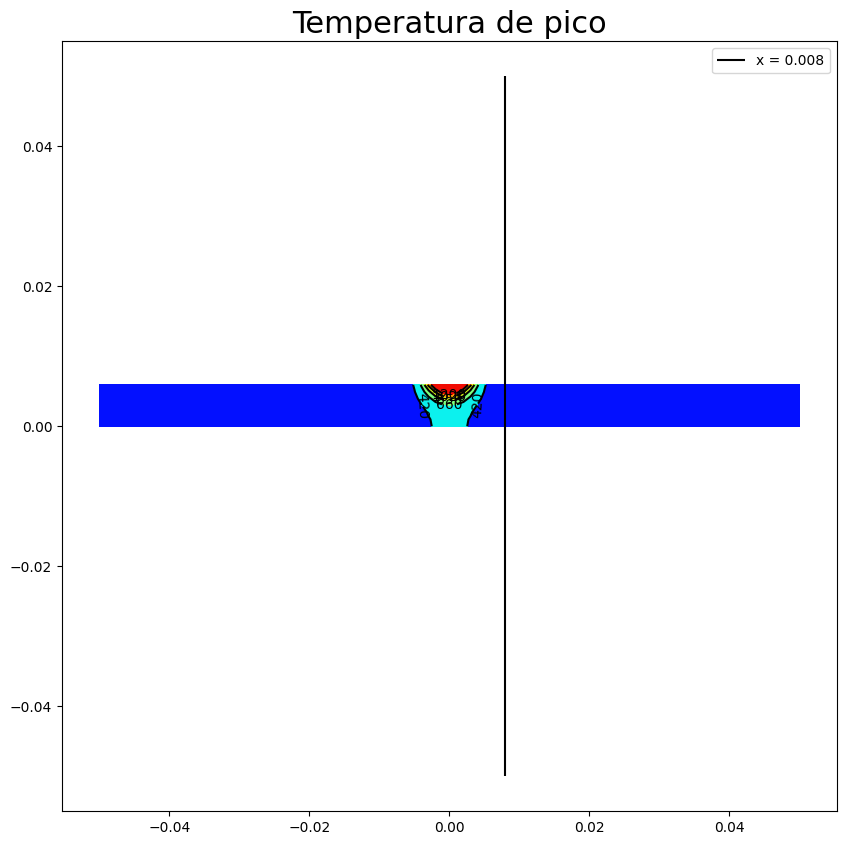

In [95]:
fig = plt.figure(figsize=(10, 10))

plot_temperatura_pico(fig, tm, plot_points=False)
if xline:
    plt.vlines(x=xline, ymin=-0.05, ymax=0.05, colors='black', label=f'x = {str(round(xline, 5))}')
    plt.legend()

plt.show()
